In [1]:
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import pickle

import sys
import os
sys.path.append('..')

import horus as ho

In [2]:
from simsopt.configs import get_w7x_data

In [3]:
w7x = get_w7x_data()

In [4]:
from simsopt.field import Current

In [5]:
# GYM00+1750
currents = [Current(1.109484) * 1e6 for _ in range(5)]
currents.append(Current(-0.3661) * 1e6)
currents.append(Current(-0.3661) * 1e6)

# # 
# currents = [Current(1.109484) * 1e6 for _ in range(5)]
# currents.append(Current(-0.3661) * 1e6)
# currents.append(Current(-0.3661) * 1e6)

# currents = [Current(1.109484) * 1e6 for _ in range(5)]
# currents.append(Current(-0.3661) * 1e6)
# currents.append(Current(-0.3661) * 1e6)

In [6]:
bs, bsh, (nfp, coils, ma, sc_fieldline) = ho.stellarator(w7x[0], currents, w7x[2], nfp=5, surface_radius=2)

#### Plot the current difference

In [66]:
curr_diff

[-510516.0, -510516.0, -510516.0, -510516.0, -510516.0, -366100.0, -366100.0]

In [67]:
curr_diff = []
for actual, base in zip(currents,  w7x[1]):
    print(base.current, " | ", actual.current_to_scale.current * 1e6)
    curr_diff.append(actual.current_to_scale.current * 1e6 - base.current)

1620000.0  |  1109484.0
1620000.0  |  1109484.0
1620000.0  |  1109484.0
1620000.0  |  1109484.0
1620000.0  |  1109484.0
0.0  |  -366100.0
0.0  |  -366100.0


In [ ]:
cmap = plt.colormaps['RdBu']
norm = plt.Normalize(min(curr_diff), max(curr_diff))
colors = cmap(norm(curr_diff))
colors = colors[:, :3]

In [ ]:
def rep(data):
            if close:
                return np.concatenate((data, [data[0]]))
            else:
                return data

In [ ]:
# Assuming curr_diff is a list of differences in currents
# Normalize curr_diff to the range [0, 1] for coloring

# Plot the coils
for i, coil in enumerate(coils):
    c


mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

In [ ]:
from mayavi import mlab
for i, coil in enumerate(coils):
    coil.plot(engine="mayavi", show=False, color=tuple(colors[i%7]))

# get the current lut manager
mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

#### Poincare

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [357]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 1
Rs = np.linspace(6.05, 6.2, nfieldlines)
Zs = [ma.gamma()[0, 2] for _ in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

nfieldlines = 2
p1 = np.array([5.6144507858315915, -0.8067790944375764])
p2 = np.array([5.78, -0.6])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
Rs, Zs = np.meshgrid(Rs, Zs)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])

RZs = np.concatenate((RZs, RZs2))

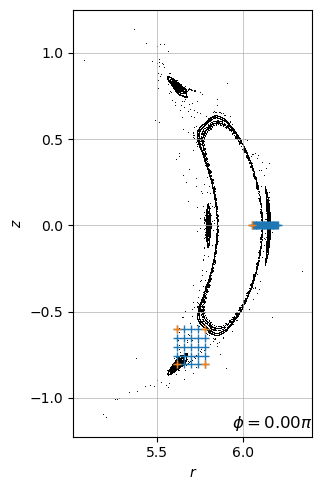

In [358]:
ax.plot(RZs[:, 0], RZs[:, 1], '+')
fig

In [359]:
tys, phis = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10, plot=False)

<Figure size 640x480 with 0 Axes>

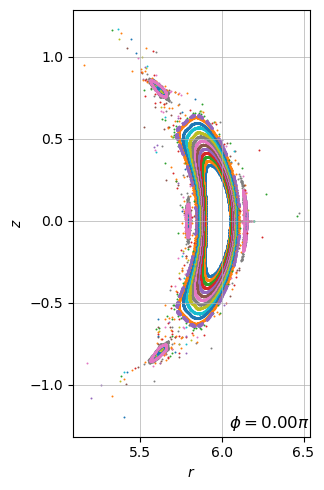

In [57]:
_, _, fig, ax = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10)

In [60]:
for col in ax[0,0].collections:
    col.set_color('black')
    col.set_sizes([0.5])

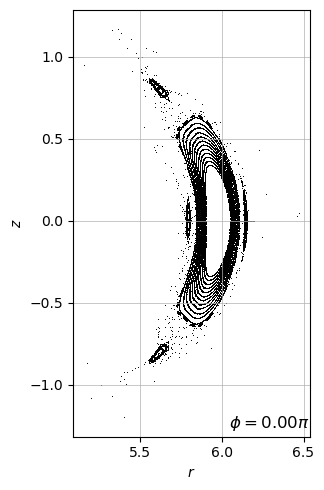

In [61]:
fig

In [63]:
# import pickle
# pickle.dump(fig, open("../output/poincare_GYM000+1750_chaotic_black.pickle", "wb"))

#### Finding fix-point

In [355]:
fig = pickle.load(open("../output/W7X_GYM000-1750_poincare_black.pkl", "rb"))
ax = fig.get_axes()[0]
plt.show()

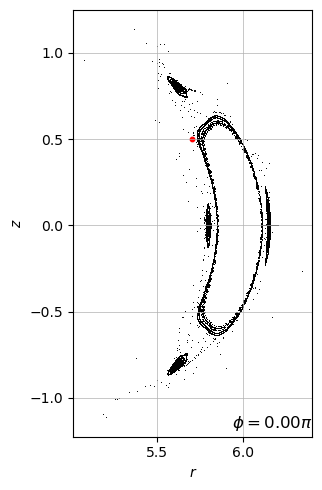

In [8]:
# guess = [5.6, 0.8] # O point
guess = [5.7, 0.5] # X point
# guess = [5.78, -0.6]
ax.scatter(guess[0], guess[1], c='r', s=10)
fig

In [9]:
from pyoculus.solvers import FixedPoint
ps = ho.SimsoptBfieldProblem(ma.gamma()[0, 0], 0, 5, bs)

In [ ]:
gamma = ho.trace(bs, 40*2*np.pi, [5.72, 0, 0.68], tol=1e-9)

In [ ]:
from mayavi import mlab
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))

mlab.show()

In [219]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-9

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-18
pparams['niter'] = 100

fp = FixedPoint(ps, pparams, integrator_params=iparams)
fp.compute(guess=guess, pp=5, qq=4, sbegin=5.2, send=6.2, checkonly=True)

In [220]:
results = [list(p) for p in zip(fp.x, fp.y, fp.z)]

In [221]:
results

[[5.699569970135461, 0.0, 0.5256033542654256],
 [5.699569969647767, 0.0, -0.5256033556619757],
 [5.883462106305232, 0.0, -0.6556749688478208],
 [5.8834621048332, 0.0, 0.6556749704511491],
 [5.699569970135464, 0.0, 0.5256033542654209]]

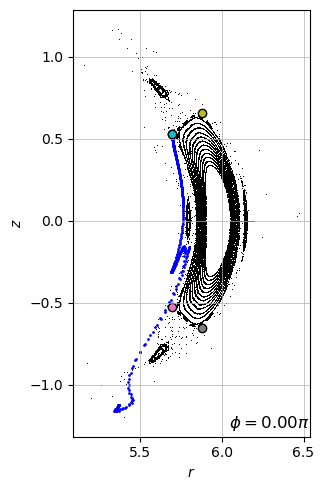

In [294]:
for rr in results:
    ax.scatter(rr[0], rr[2], marker="o", edgecolors="black", linewidths=1)
fig

#### Tracing stable and unstable manifolds

In [14]:
from scipy.integrate import solve_ivp

In [ ]:
from pyoculus.solvers import Manifold

In [301]:
M = fp.jacobian

In [302]:
eigRes = np.linalg.eig(M)

In [303]:
lambda_u = eigRes.eigenvalues[0]
lambda_v = eigRes.eigenvalues[1]

print(lambda_u, lambda_v)

0.3832537822950912 2.609237125711047


In [304]:
u = eigRes.eigenvectors[0]
v = eigRes.eigenvectors[1]

u = u / np.linalg.norm(u)
v = v / np.linalg.norm(v)

print(u, v)

[-0.98945215 -0.14486007] [ 0.66414657 -0.74760239]


In [348]:
eps_lower = -1e-18
rEps = np.array([fp.x[0], fp.z[0]]) + eps_lower * v
print(rEps)

[5.69956997 0.52560335]


In [349]:
out = ho.poincare_ivp_2d(bs, np.atleast_2d(rEps), [0], nintersect=1, mpol=4, nfp=5, atol = 1e-16, rtol = 1e-10)

In [350]:
out.y

array([[5.69956997, 5.69956997],
       [0.52560335, 0.52560335]])

In [351]:
eps_dir = out.y[:,1]-out.y[:,0]
print(eps_dir)
eps_dir = eps_dir / np.linalg.norm(eps_dir)
print(eps_dir)

[-1.50854440e-10 -1.94390171e-10]
[-0.61308457 -0.79001728]


In [325]:
lambda_v * (rEps-np.array([fp.x[0], fp.z[0]]))

array([-1.73290995e-10,  1.95067084e-10])

In [72]:
# eps = np.atleast_2d(np.linspace(1e-12, 1e-8, 100)).T
# rX = (np.array([fp.x[0], fp.z[0]], ndmin=2).T @ np.ones((1, eps.shape[0]))).T
# RZs = rX + (eps @ np.atleast_2d(v))

In [277]:
neps = 100
Rs = np.linspace(out.y[0,0], out.y[0,1], neps, endpoint=False)
Zs = np.linspace(out.y[1,0], out.y[1,1], neps, endpoint=False)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

In [278]:
out = ho.poincare_ivp_2d(bs, RZs, [0], nintersect=30, mpol=4, nfp=5)

In [298]:
fig = pickle.load(open("../output/W7X_GYM000-1750_poincare_chaotic_black.pkl", "rb"))
ax = fig.get_axes()[0]

In [299]:
for yy in out.y.T:
    yy = yy.reshape(-1, 2)
    ax.scatter(yy[:, 0], yy[:, 1], marker=".", s=4, c="blue")

# plt.xlim(1.2, 1.8)
# plt.ylim(-0.7, 0.7)

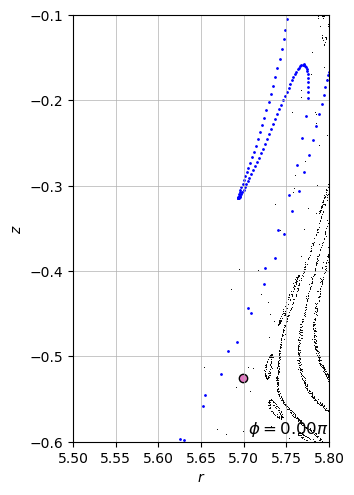

In [297]:
ax.set_xlim(5.5, 5.8)
ax.set_ylim(-0.6, -0.1)

fig

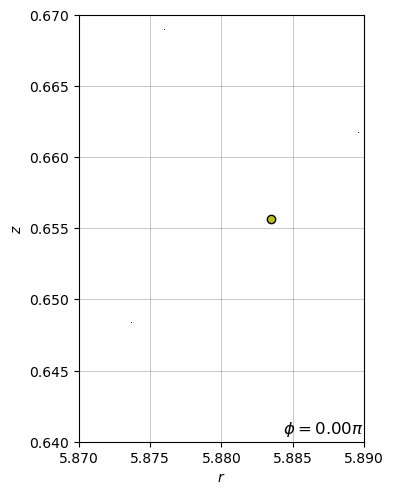

In [289]:
ax.set_xlim(5.87, 5.89)
ax.set_ylim(0.64, 0.67)

fig

In [273]:
pickle.dump(fig, open("../output/W7X_GYM000+1750_tangle.pkl", "wb"))

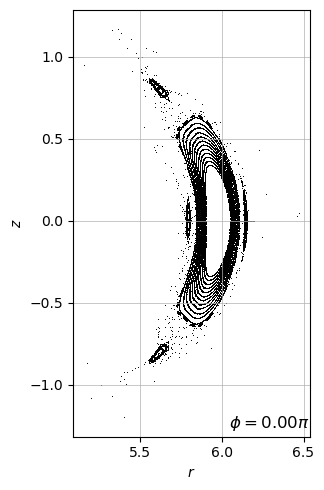

In [182]:
fig = pickle.load(open("../output/poincare_GYM000-1750_14032024_1051.pkl", "rb"))
ax = fig.get_axes()[0]

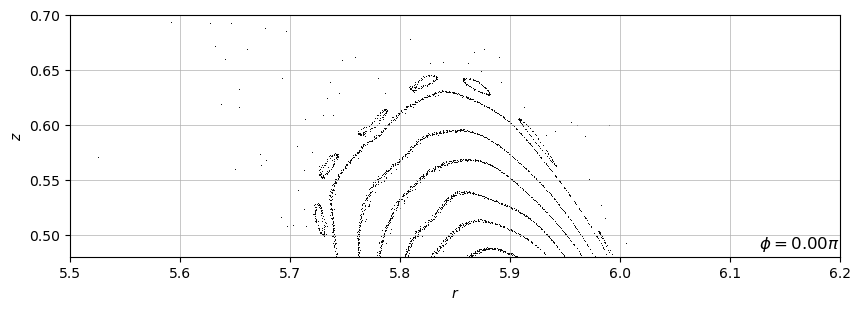

In [185]:
ax.set_xlim(5.5, 6.2)
ax.set_ylim(0.48, 0.7)
fig